# _kNN_: _k_-Vecinos Cercanos

Es un algoritmo de aprendizaje supervisado en el que se asigna a un punto de prueba, la clase mayoritaria entre los _k_ vecinos más próximos, utilizando una métrica de distancia. En la siguiente figura se puede ver un ejemplo para _k_ = 5

Mounted at /content/drive
/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas


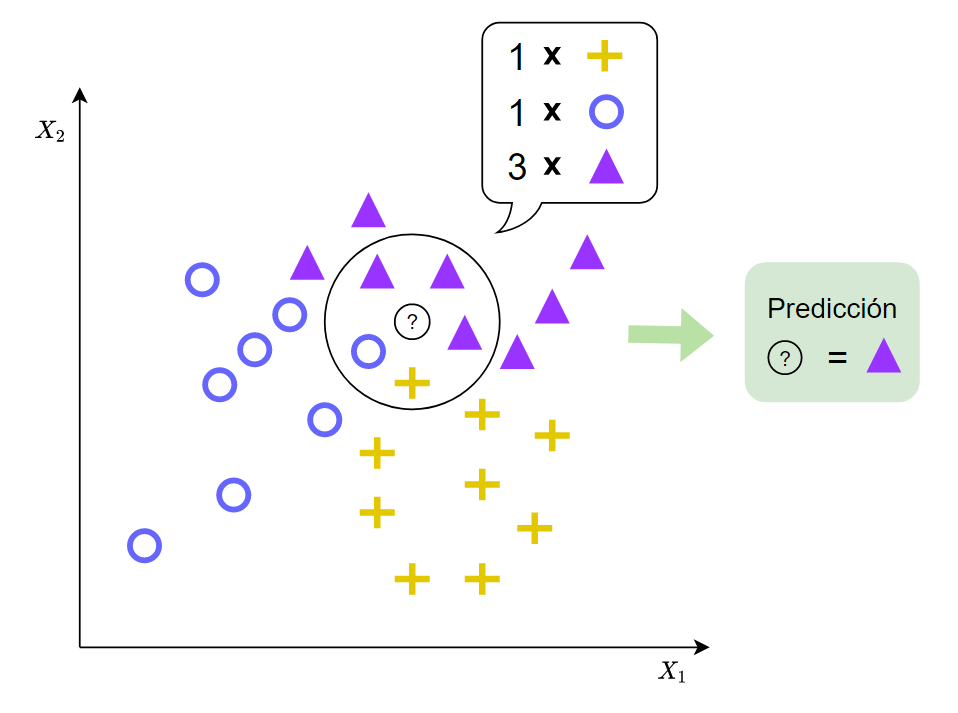

In [1]:
import sys
from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

display(Image(filename='./2_imagenes/knn.png', width=700))

## Métricas de distancia

### Minkowski:$\qquad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = [ \sum\limits_{j=1}^{m}{(|x_j^{[a]}-x_j^{[b]}|)^p} ]^{\frac{1}{p}}$

### Manhattan: $\quad p=1 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) =  \sum\limits_{j=1}^{m}{|x_j^{[a]}-x_j^{[b]}|}$

### Euclídea: $\quad p=2 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = \sqrt{ \sum\limits_{j=1}^{m}{(x_j^{[a]}-x_j^{[b]})^2}}$

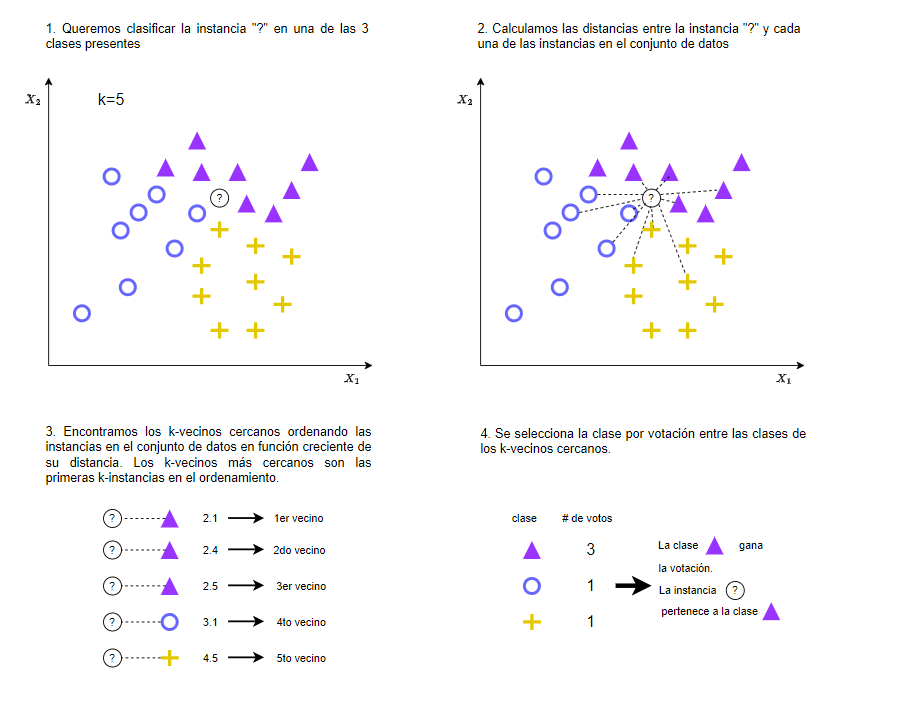

In [ ]:
display(Image(filename='./2_imagenes/knn_algo.png', width=900))

## Clase KNN

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
df_iris = load_iris(as_frame=True).frame
X = df_iris[ ['petal length (cm)', 'petal width (cm)'] ]
y = df_iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1,  stratify = y)

In [5]:
# Resetear los índices para que sean secuenciales
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [6]:
# Normalización de los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X1):
        predictions = [self._predict(x) for x in X1]
        return np.array(predictions)

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

## Usamos el clasificador

In [8]:
# Creamos un objeto knn usando la clase implementada
knn = KNN(k=3)
# llamamos al método de entrenamiento ---> Datos de entrenamiento
knn.fit(X_train_std, y_train)

In [11]:
# Evaluamos el clasificador con los datos de prueba
y_pred = knn.predict(X_test_std)
# Comparamos nuestra predicción con los targets
(y_pred==y_test).sum()

44

A continuación vamos a utilizar una función `plot_decision_regions` implementada en el archivo `graficacion.py` de la carpeta `modulos` para graficar las regiones de clasificación.
Se va a crear un mapa de colores en función del resultado de la predicción de nuestro clasificador.
Utilizaremos la misma función con otros clasificadores. Notar que se pasa un clasificador como parámetro y que en su interior se hace una llamada al método `predict()` del clasificador.

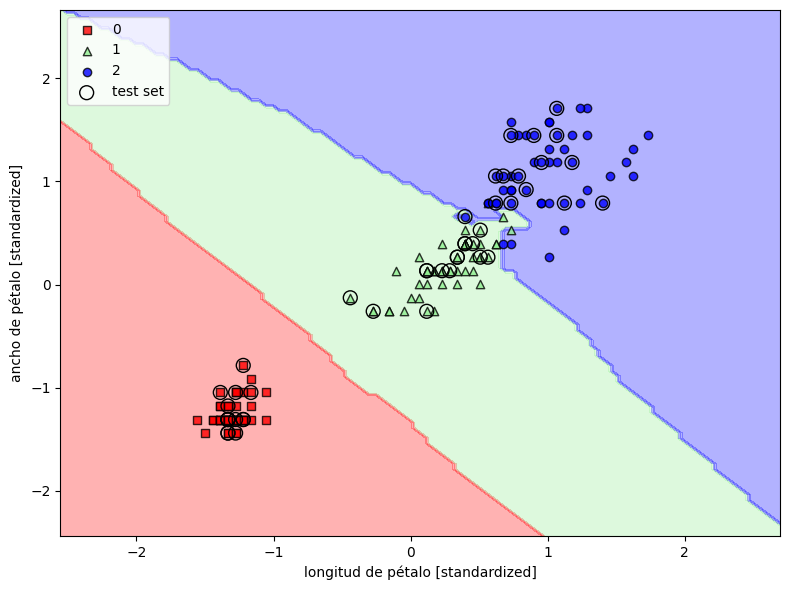

In [14]:
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(8,6))
plot_decision_regions( X=X_combined_std, y=y_combined, clasificador=knn, test_idx=range(105, 150), resolution=0.05)
plt.xlabel('longitud de pétalo [standardized]')
plt.ylabel('ancho de pétalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Funcion acurracy

In [14]:
def accuracy(y_pred, y_test):
    return np.sum( np.equal(y_pred, y_test) ) / len(y_test)

print(accuracy(y_pred, y_test))


0.9777777777777777


# KNN usando _scikit-Learn_

### Cargamos los datos

El conjunto de datos en el archivo `prestamos.csv` muestra algunos registros de préstamos personales de LendingClub. LendingClub es líder en préstamos entre pares en el que grupos de inversionistas otorgan préstamos personales a individuos. El objetivo del análisis de este conjunto de datos es predecir el resultado de un nuevo préstamo potencial. Las opciones del resultado son: _pagado_ o _incumplido_.

In [15]:
df_prestamos = pd.read_csv("./1_datos/prestamos.csv", index_col=False)
df_prestamos.head()

,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos,estado
0,12.62,36,690.0,694.0,18.75,pagado
1,16.99,36,670.0,674.0,24.54,pagado
2,10.15,36,700.0,704.0,6.95,pagado
3,6.89,36,740.0,744.0,7.78,pagado
4,10.42,60,730.0,734.0,18.84,pagado


In [16]:
df_prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134531 entries, 0 to 134530
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tasa de interes       134531 non-null  float64
 1   plazo prestamo        134531 non-null  int64  
 2   fico limite inferior  134531 non-null  float64
 3   fico limite superior  134531 non-null  float64
 4   deudas_ingresos       134503 non-null  float64
 5   estado                134531 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ MB


### Separamos predictores de las etiquetas

In [17]:
X = df_prestamos.drop(columns=['estado'])
y = df_prestamos['estado']


### Dividimos los datos en entrenamiento y prueba

20% datos de prueba, utilice `random_state=42`, estratificar en función de la clase.


In [18]:
# division de los datos en test y prueba mas las etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42,  stratify = y)

# Resetear los índices para que sean secuenciales
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


**Hay datos faltantes?**


In [19]:

# índices de las filas con datos faltantes
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx]

null_rows_idxx = X_test.isnull().any(axis=1)
X_test.loc[null_rows_idxx]



,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos
7223,11.99,36,675.0,679.0,NaN
8711,27.27,36,670.0,674.0,NaN
11633,11.99,36,720.0,724.0,NaN
13954,13.59,36,760.0,764.0,NaN
18510,14.03,60,725.0,729.0,NaN
21155,14.08,60,685.0,689.0,NaN
25816,13.59,60,760.0,764.0,NaN


In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
print("Medianas",imputer.statistics_)
X_train_trans = imputer.transform(X_train) # me devuelve un numpy array
X_test_trans = imputer.transform(X_test) # me devuelve un numpy array




Medianas [ 12.74  36.   690.   694.    17.61]


In [28]:
print(imputer.feature_names_in_)

X_train = pd.DataFrame(X_train_trans, columns=X_train.columns, index=X_train.index)
X_train.loc[null_rows_idx].head()

X_test= pd.DataFrame(X_test_trans, columns=X_test.columns, index=X_test.index)
X_test.loc[null_rows_idxx].head()



['tasa de interes' 'plazo prestamo' 'fico limite inferior'
 'fico limite superior' 'deudas_ingresos']


,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos
7223,11.99,36.0,675.0,679.0,17.61
8711,27.27,36.0,670.0,674.0,17.61
11633,11.99,36.0,720.0,724.0,17.61
13954,13.59,36.0,760.0,764.0,17.61
18510,14.03,60.0,725.0,729.0,17.61


**Es necesario escalar los datos?**

In [95]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)
bancario_train_std = std_scaler.transform(X_train)
bancario_test_std = std_scaler.transform(X_test)

In [96]:
bancario_train_std = pd.DataFrame(bancario_train_std, columns=X_train.columns, index=X_train.index)
bancario_test_std = pd.DataFrame(bancario_test_std, columns=X_test.columns, index=X_test.index)



### Entrenamiento del clasificador [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Antes de entrenar nuestro clasificador, vamos a dividir los datos de entrenamiento en un conjunto de validación `X_valid` y uno de entrenamiento nuevo. Para esto, tomemos las primeras 20000 muestras como conjunto de validación. No olvidar dividir también las etiquetas.

In [106]:

# Dividir los datos
X_valid = bancario_train_std.iloc[:2000]
y_valid = y_train.iloc[:2000]

# Convertir de vuelta a arrays si es necesario
X_valid = X_valid.values
y_valid = y_valid.values

# Dividir los datos
X_test_200 = bancario_test_std.iloc[:100]
y_test_200 = y_test.iloc[:100]


X_test_200 = X_test_200.values
print(len(y_test_200))


100


In [107]:
# Creamos un objeto knn usando la clase implementada
knn = KNN(10)
# llamamos al método de entrenamiento ---> Datos de entrenamiento
knn.fit(X_valid, y_valid)

# Evaluamos el clasificador con los datos de prueba
y_pred = knn.predict(X_test_200)
# Comparamos nuestra predicción con los targets
(y_pred==y_test_200).sum()

82

calcule la tasa de aciertos de las predicciones del clasificador (aciertos/total de etiquetas)

In [36]:
print(accuracy(y_pred, y_test_200))

0.82


**GRAFICOS**

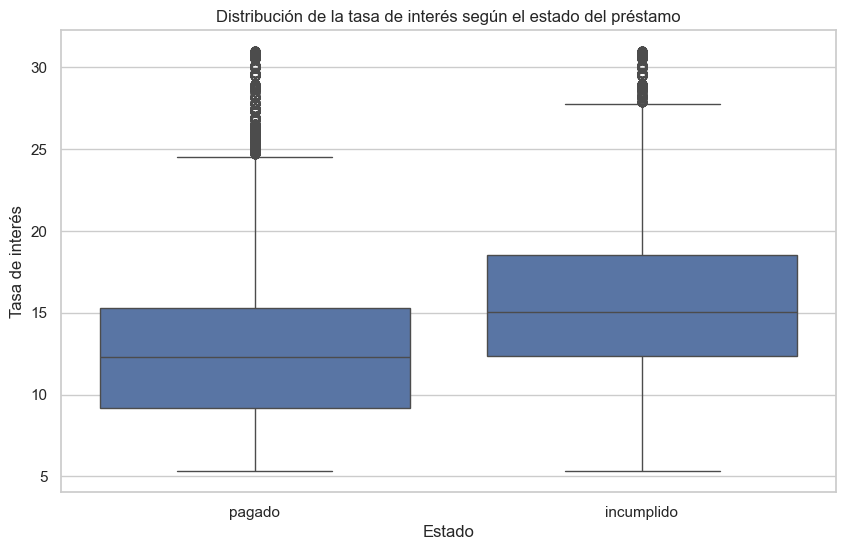

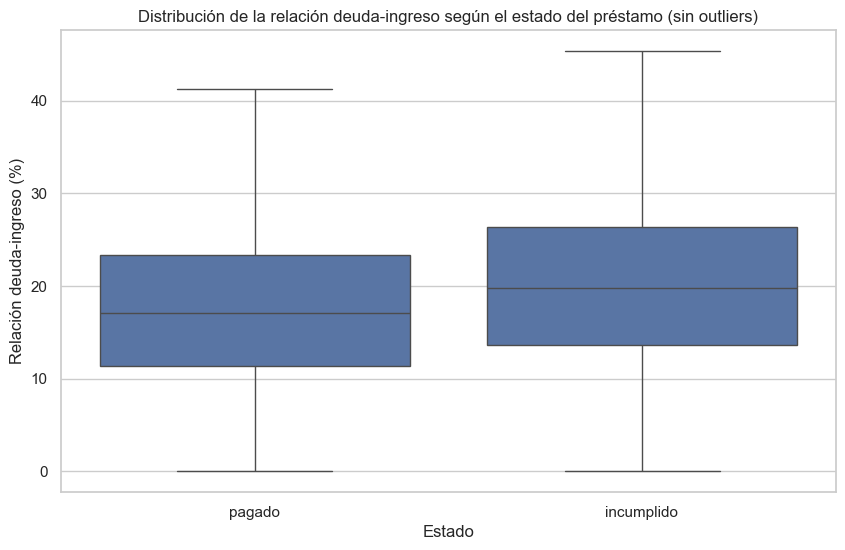

In [108]:
import seaborn as sns
df = df_prestamos
# Configuración de los gráficos
sns.set(style="whitegrid")

# Boxplot para comparar la tasa de interés según el estado del préstamo
plt.figure(figsize=(10, 6))
sns.boxplot(x="estado", y="tasa de interes", data=df)
plt.title("Distribución de la tasa de interés según el estado del préstamo")
plt.xlabel("Estado")
plt.ylabel("Tasa de interés")
plt.show()

# Boxplot para comparar la relación deuda-ingreso según el estado del préstamo
plt.figure(figsize=(10, 6))
sns.boxplot(x="estado", y="deudas_ingresos", data=df, showfliers=False)
plt.title("Distribución de la relación deuda-ingreso según el estado del préstamo (sin outliers)")
plt.xlabel("Estado")
plt.ylabel("Relación deuda-ingreso (%)")
plt.show()


Utilice los datos de validación para estimar un valor adecuado de K. Para esto, grafique la tasa de aciertos (accuray) en función de valores crecientes de K. Utilice la función [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

**KNN desarrollado por nosotros** 

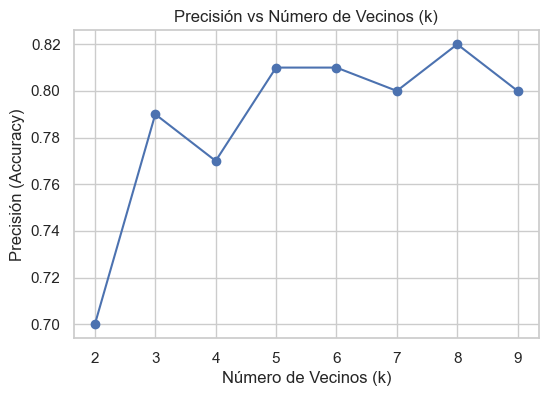

In [114]:
from sklearn.metrics import accuracy_score
accuracy_saldo = []

for i in range (2,10):
    # Creamos un objeto knn usando la clase implementada
    knn = KNN(k=i)
    # llamamos al método de entrenamiento ---> Datos de entrenamiento
    knn.fit(X_valid, y_valid)
    y_pred = knn.predict(X_test_200)
    accu = accuracy_score(y_test_200, y_pred)
    accuracy_saldo.append([accu,i])


# Convertir la lista de resultados en dos listas separadas para el gráfico
k_values = [result[1] for result in accuracy_saldo]
accuracies = [result[0] for result in accuracy_saldo]

# Crear el gráfico
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Precisión vs Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Precisión (Accuracy)")
plt.xticks(k_values)  # Asegúrate de mostrar todos los valores de k en el eje x
plt.grid(True)
plt.show()


**Knn de sklearn**

[[0.66, 2], [0.79, 3], [0.74, 4], [0.81, 5], [0.79, 6], [0.8, 7], [0.82, 8], [0.8, 9], [0.81, 10], [0.8, 11], [0.82, 12], [0.81, 13], [0.81, 14], [0.81, 15], [0.81, 16], [0.82, 17], [0.82, 18], [0.82, 19], [0.8, 20], [0.82, 21], [0.83, 22], [0.82, 23], [0.82, 24]]


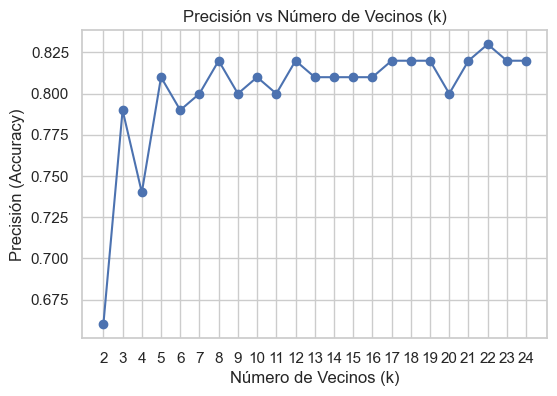

In [110]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_saldo = []

# Bucle para probar diferentes valores de k
for i in range(2, 25):
    # Creamos el modelo k-NN con el valor de k correspondiente
    knn1 = KNeighborsClassifier(n_neighbors=i)
    
    # Entrenamos el modelo con los datos de validación
    knn1.fit(X_valid, y_valid)
    
    # Predecimos las etiquetas para el conjunto de test
    y_pred = knn1.predict(X_test_200)
    
    # Calculamos la precisión (accuracy) del modelo
    accu = accuracy_score(y_test_200, y_pred)
    
    # Guardamos la precisión y el valor de k en la lista
    accuracy_saldo.append([accu, i])

# Imprimimos la lista de precisiones y valores de k
print(accuracy_saldo)


# Convertir la lista de resultados en dos listas separadas para el gráfico
k_values = [result[1] for result in accuracy_saldo]
accuracies = [result[0] for result in accuracy_saldo]

# Crear el gráfico
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Precisión vs Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Precisión (Accuracy)")
plt.xticks(k_values)  # Asegúrate de mostrar todos los valores de k en el eje x
plt.grid(True)
plt.show()



Seleccione el valor de K a partir del cual el clasificador presenta un desempeño adecuado con los datos de validación. Entrene un nuevo clasificador con este valor de K y evalúe el resultado con los datos de prueba.